# PyCaret 2 Classification Example
This notebook is created using PyCaret 2.0. Last updated : 31-07-2020

In [1]:
# check version
from pycaret.utils import version
version()

'2.3.10'

# 1. Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/home/thu/INT3041E_AI_PM2.5-Concentration-Estimation/data/add_AQI.csv')
data

,time,ID,pm25,lat,lon,SQRT_SEA_DEM_LAT,WSPD,WDIR,TMP,TX,...,NDVI,CO,HCHO,NO2,SO2,CLOUD,O3,AAI,AQI,AQI_Class
0,2020-01-01,19,116.949130,21.049750,105.741870,5.922647,1.136119,145.942749,20.811243,23.219995,...,0.000551,0.045586,0.000060,0.000072,0.000035,0.711612,0.101653,-0.836203,183,3
1,2020-01-01,79,105.103044,21.015250,105.800130,4.307231,1.136119,145.942749,20.811243,23.219995,...,-0.003006,0.041913,0.000107,0.000086,0.000056,0.761720,0.103635,-0.718537,177,3
2,2020-01-01,163,118.285100,21.024347,106.017288,4.988467,0.651509,145.395233,20.677492,23.029993,...,0.004388,0.042329,0.000108,0.000071,0.000026,0.867689,0.102144,-0.942304,183,3
3,2020-01-01,300,116.739130,21.023532,105.853941,4.865087,1.136119,145.942749,20.811243,23.219995,...,-0.001733,0.041913,0.000097,0.000085,0.000079,0.779294,0.102875,-0.692613,183,3
4,2020-01-02,19,76.856667,21.049750,105.741870,5.922647,2.744283,147.084442,22.176249,25.119989,...,0.016035,0.042298,0.000115,0.000082,-0.000345,0.705396,0.103488,-1.119681,162,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11503,2021-12-31,163,16.154054,21.024347,106.017288,4.988467,1.669253,22.916901,16.846243,18.989985,...,-0.002742,0.044463,0.000133,0.000080,0.000107,1.000000,0.113309,-0.477924,60,1
11504,2021-12-31,172,17.153631,20.927000,106.314000,4.784339,1.322285,353.486359,17.187494,18.839991,...,0.001342,0.047781,0.000043,0.000096,0.000121,1.000000,0.113023,-0.511212,62,1
11505,2021-12-31,173,11.901323,20.977400,106.430800,4.589203,0.235641,347.438232,17.732492,19.739985,...,0.010294,0.047366,0.000045,0.000073,0.000172,1.000000,0.112750,-0.629895,50,0
11506,2021-12-31,195,24.209832,21.338470,105.367300,5.228505,1.295622,97.865257,16.122246,17.824003,...,-0.003163,0.049873,0.000110,0.000077,0.000105,1.000000,0.112451,-0.337096,76,1


In [4]:
def aqi_bucket(aqi):
    if aqi <= 50: return 'Good'
    elif aqi <= 100: return 'Moderate'
    elif aqi <= 150: return 'Unhealthy for Sensitive'
    elif aqi <= 200: return 'Unhealthy'
    elif aqi <= 300: return 'Very Unhealthy'
    else: return 'Hazardous'

In [5]:
# Tính toán AQI và phân loại thành bucket
data['AQI_Bucket'] = data['AQI'].apply(aqi_bucket)
data

,time,ID,pm25,lat,lon,SQRT_SEA_DEM_LAT,WSPD,WDIR,TMP,TX,...,CO,HCHO,NO2,SO2,CLOUD,O3,AAI,AQI,AQI_Class,AQI_Bucket
0,2020-01-01,19,116.949130,21.049750,105.741870,5.922647,1.136119,145.942749,20.811243,23.219995,...,0.045586,0.000060,0.000072,0.000035,0.711612,0.101653,-0.836203,183,3,Unhealthy
1,2020-01-01,79,105.103044,21.015250,105.800130,4.307231,1.136119,145.942749,20.811243,23.219995,...,0.041913,0.000107,0.000086,0.000056,0.761720,0.103635,-0.718537,177,3,Unhealthy
2,2020-01-01,163,118.285100,21.024347,106.017288,4.988467,0.651509,145.395233,20.677492,23.029993,...,0.042329,0.000108,0.000071,0.000026,0.867689,0.102144,-0.942304,183,3,Unhealthy
3,2020-01-01,300,116.739130,21.023532,105.853941,4.865087,1.136119,145.942749,20.811243,23.219995,...,0.041913,0.000097,0.000085,0.000079,0.779294,0.102875,-0.692613,183,3,Unhealthy
4,2020-01-02,19,76.856667,21.049750,105.741870,5.922647,2.744283,147.084442,22.176249,25.119989,...,0.042298,0.000115,0.000082,-0.000345,0.705396,0.103488,-1.119681,162,3,Unhealthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11503,2021-12-31,163,16.154054,21.024347,106.017288,4.988467,1.669253,22.916901,16.846243,18.989985,...,0.044463,0.000133,0.000080,0.000107,1.000000,0.113309,-0.477924,60,1,Moderate
11504,2021-12-31,172,17.153631,20.927000,106.314000,4.784339,1.322285,353.486359,17.187494,18.839991,...,0.047781,0.000043,0.000096,0.000121,1.000000,0.113023,-0.511212,62,1,Moderate
11505,2021-12-31,173,11.901323,20.977400,106.430800,4.589203,0.235641,347.438232,17.732492,19.739985,...,0.047366,0.000045,0.000073,0.000172,1.000000,0.112750,-0.629895,50,0,Good
11506,2021-12-31,195,24.209832,21.338470,105.367300,5.228505,1.295622,97.865257,16.122246,17.824003,...,0.049873,0.000110,0.000077,0.000105,1.000000,0.112451,-0.337096,76,1,Moderate


In [6]:
data = data.drop(columns=['time', 'ID', 'pm25', 'AQI', 'AQI_Class'])
data

,lat,lon,SQRT_SEA_DEM_LAT,WSPD,WDIR,TMP,TX,TN,TP,RH,PRES2M,NDVI,CO,HCHO,NO2,SO2,CLOUD,O3,AAI,AQI_Bucket
0,21.049750,105.741870,5.922647,1.136119,145.942749,20.811243,23.219995,18.939997,0.3750,74.750000,102197.203125,0.000551,0.045586,0.000060,0.000072,0.000035,0.711612,0.101653,-0.836203,Unhealthy
1,21.015250,105.800130,4.307231,1.136119,145.942749,20.811243,23.219995,18.939997,0.3750,74.750000,102197.203125,-0.003006,0.041913,0.000107,0.000086,0.000056,0.761720,0.103635,-0.718537,Unhealthy
2,21.024347,106.017288,4.988467,0.651509,145.395233,20.677492,23.029993,18.879999,0.1250,73.687500,102228.796875,0.004388,0.042329,0.000108,0.000071,0.000026,0.867689,0.102144,-0.942304,Unhealthy
3,21.023532,105.853941,4.865087,1.136119,145.942749,20.811243,23.219995,18.939997,0.3750,74.750000,102197.203125,-0.001733,0.041913,0.000097,0.000085,0.000079,0.779294,0.102875,-0.692613,Unhealthy
4,21.049750,105.741870,5.922647,2.744283,147.084442,22.176249,25.119989,20.299982,0.1875,78.012497,102025.328125,0.016035,0.042298,0.000115,0.000082,-0.000345,0.705396,0.103488,-1.119681,Unhealthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11503,21.024347,106.017288,4.988467,1.669253,22.916901,16.846243,18.989985,14.730005,0.0625,65.837502,102317.015625,-0.002742,0.044463,0.000133,0.000080,0.000107,1.000000,0.113309,-0.477924,Moderate
11504,20.927000,106.314000,4.784339,1.322285,353.486359,17.187494,18.839991,15.249994,0.0000,63.812500,102335.617188,0.001342,0.047781,0.000043,0.000096,0.000121,1.000000,0.113023,-0.511212,Moderate
11505,20.977400,106.430800,4.589203,0.235641,347.438232,17.732492,19.739985,15.609980,0.0000,65.050003,102115.812500,0.010294,0.047366,0.000045,0.000073,0.000172,1.000000,0.112750,-0.629895,Good
11506,21.338470,105.367300,5.228505,1.295622,97.865257,16.122246,17.824003,14.982986,0.0000,70.632500,101743.898438,-0.003163,0.049873,0.000110,0.000077,0.000105,1.000000,0.112451,-0.337096,Moderate


# 2. Initialize Setup

In [7]:
from pycaret.classification import *
clf1 = setup(data, target = 'AQI_Bucket', silent=True, session_id=123, fold = 5)

,Description,Value
0,session_id,123
1,Target,AQI_Bucket
2,Target Type,Multiclass
3,Label Encoded,"Good: 0, Hazardous: 1, Moderate: 2, Unhealthy: 3, Unhealthy for Sensitive: 4, Very Unhealthy: 5"
4,Original Data,"(11508, 20)"
5,Missing Values,False
6,Numeric Features,19
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


# 3. Compare Baseline

In [8]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6890,0.8615,0.4580,0.6799,0.6731,0.5113,0.5208,0.8800
lightgbm,Light Gradient Boosting Machine,0.6857,0.8646,0.4612,0.6733,0.6728,0.5129,0.5185,678.5280
et,Extra Trees Classifier,0.6793,0.8574,0.4496,0.6692,0.6639,0.4977,0.5062,0.7040
gbc,Gradient Boosting Classifier,0.6508,0.8386,0.4207,0.6379,0.6265,0.4441,0.4584,23.9860
dt,Decision Tree Classifier,0.5793,0.6891,0.4215,0.5824,0.5805,0.3792,0.3794,0.1880
lda,Linear Discriminant Analysis,0.5590,0.7512,0.2940,0.5258,0.5140,0.2786,0.2967,0.1000
qda,Quadratic Discriminant Analysis,0.5265,0.7601,0.4349,0.5542,0.5326,0.3283,0.3320,0.0420
ridge,Ridge Classifier,0.5249,0.0000,0.2306,0.4694,0.4182,0.1578,0.2034,0.0360
knn,K Neighbors Classifier,0.5202,0.6986,0.3023,0.4890,0.4948,0.2425,0.2483,2.4520
dummy,Dummy Classifier,0.4915,0.5000,0.1667,0.2416,0.3239,0.0000,0.0000,0.0960


# 4. Create Model

In [9]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5854,0.6884,0.4454,0.5853,0.5851,0.3819,0.3820
1,0.5779,0.6914,0.3869,0.5850,0.5811,0.3793,0.3796
2,0.5680,0.6806,0.4028,0.5672,0.5674,0.3619,0.3620
3,0.5847,0.6949,0.4242,0.5888,0.5863,0.3920,0.3922
4,0.5804,0.6904,0.4482,0.5856,0.5827,0.3811,0.3813
Mean,0.5793,0.6891,0.4215,0.5824,0.5805,0.3792,0.3794
Std,0.0063,0.0048,0.0238,0.0077,0.0068,0.0097,0.0098


In [10]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6418,0.8285,0.3990,0.6265,0.6118,0.4228,0.4411
1,0.6431,0.8309,0.4097,0.6321,0.6237,0.4350,0.4464
2,0.6449,0.8378,0.4155,0.6337,0.6184,0.4322,0.4485
3,0.6735,0.8523,0.4702,0.6624,0.6530,0.4870,0.4981
4,0.6505,0.8433,0.4088,0.6349,0.6254,0.4436,0.4580
Mean,0.6508,0.8386,0.4207,0.6379,0.6265,0.4441,0.4584
Std,0.0117,0.0086,0.0253,0.0126,0.0141,0.0225,0.0206


In [11]:
rf = create_model('rf', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6865,0.8518,0.4880,0.6752,0.6672,0.5037,0.5162
1,0.6934,0.8643,0.4754,0.6861,0.6807,0.5199,0.5280
2,0.6803,0.8564,0.4376,0.6691,0.6605,0.4957,0.5072
3,0.6996,0.8644,0.4588,0.6913,0.6860,0.5320,0.5388
4,0.6853,0.8706,0.4299,0.6780,0.6710,0.5050,0.5140
Mean,0.6890,0.8615,0.4580,0.6799,0.6731,0.5113,0.5208
Std,0.0067,0.0066,0.0219,0.0079,0.0092,0.0130,0.0112


In [12]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4922,0.6595,0.1959,0.3495,0.3802,0.0809,0.1111
1,0.4804,0.6658,0.1953,0.3662,0.3697,0.0716,0.0953
2,0.4972,0.6673,0.1997,0.3544,0.3834,0.0900,0.1241
3,0.4885,0.6605,0.1948,0.3545,0.3731,0.0746,0.1036
4,0.4947,0.6710,0.1954,0.3677,0.3739,0.0688,0.1063
Mean,0.4906,0.6648,0.1962,0.3585,0.3761,0.0772,0.1081
Std,0.0058,0.0043,0.0018,0.0072,0.0050,0.0076,0.0095


In [13]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6691,0.8504,0.4425,0.6569,0.6507,0.4774,0.4881
1,0.6872,0.8634,0.4514,0.6780,0.6755,0.5138,0.5200
2,0.6685,0.8470,0.4524,0.6561,0.6473,0.4779,0.4893
3,0.6872,0.8603,0.4509,0.6775,0.6750,0.5139,0.5196
4,0.6847,0.8660,0.4507,0.6775,0.6711,0.5052,0.5139
Mean,0.6793,0.8574,0.4496,0.6692,0.6639,0.4977,0.5062
Std,0.0086,0.0074,0.0036,0.0104,0.0123,0.0166,0.0144


In [14]:
qda = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5202,0.7520,0.4367,0.5425,0.5265,0.3145,0.3165
1,0.5071,0.7564,0.3823,0.5369,0.5134,0.3037,0.3080
2,0.5282,0.7646,0.4543,0.5609,0.5372,0.3300,0.3330
3,0.5345,0.7590,0.4611,0.5726,0.5430,0.3483,0.3539
4,0.5425,0.7685,0.4399,0.5580,0.5430,0.3452,0.3488
Mean,0.5265,0.7601,0.4349,0.5542,0.5326,0.3283,0.3320
Std,0.0121,0.0058,0.0278,0.0129,0.0113,0.0172,0.0178


In [15]:
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3985,0.5836,0.2713,0.4630,0.4168,0.1726,0.1782
1,0.4246,0.5721,0.2911,0.4598,0.4339,0.1866,0.1894
2,0.4631,0.5814,0.2401,0.4614,0.4494,0.1824,0.1868
3,0.4687,0.6098,0.3274,0.4853,0.4697,0.2310,0.2332
4,0.2613,0.5922,0.2538,0.4648,0.2992,0.1148,0.1340
Mean,0.4032,0.5878,0.2767,0.4668,0.4138,0.1775,0.1843
Std,0.0755,0.0127,0.0306,0.0094,0.0599,0.0372,0.0316


In [16]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4711,0.6958,0.3850,0.4858,0.4581,0.2309,0.2385
1,0.4693,0.7013,0.3479,0.5058,0.4610,0.2399,0.2504
2,0.4873,0.7068,0.3738,0.5071,0.4678,0.2521,0.2630
3,0.4773,0.7062,0.3747,0.5023,0.4648,0.2512,0.2620
4,0.4885,0.7171,0.3616,0.5067,0.4701,0.2580,0.2685
Mean,0.4787,0.7055,0.3686,0.5015,0.4644,0.2464,0.2565
Std,0.0080,0.0071,0.0128,0.0081,0.0043,0.0097,0.0107


In [17]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5345,0.7047,0.3188,0.5001,0.5042,0.2544,0.2633
1,0.5258,0.6972,0.3091,0.4957,0.5004,0.2489,0.2553
2,0.5140,0.6999,0.2913,0.4801,0.4885,0.2375,0.2424
3,0.5084,0.6942,0.2993,0.4781,0.4844,0.2278,0.2324
4,0.5183,0.6971,0.2931,0.4909,0.4967,0.2438,0.2483
Mean,0.5202,0.6986,0.3023,0.4890,0.4948,0.2425,0.2483
Std,0.0091,0.0035,0.0103,0.0086,0.0073,0.0092,0.0106


In [60]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6729,0.8522,0.4476,0.6591,0.6567,0.4877,0.4955
1,0.6865,0.8670,0.4660,0.6736,0.6742,0.5147,0.5201
2,0.6785,0.8629,0.4574,0.6645,0.6642,0.5026,0.5083
3,0.7064,0.8756,0.5097,0.6970,0.6984,0.5515,0.5540
4,0.6840,0.8653,0.4250,0.6721,0.6703,0.5082,0.5148
Mean,0.6857,0.8646,0.4612,0.6733,0.6728,0.5129,0.5185
Std,0.0114,0.0075,0.0279,0.0130,0.0141,0.0212,0.0195


INFO:logs:create_model_container: 36
INFO:logs:master_model_container: 36
INFO:logs:display_container: 23
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [18]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [19]:
models(type='ensemble').index.tolist()

['rf', 'ada', 'gbc', 'et', 'lightgbm']

In [20]:
try:
    ensembled_models = compare_models(include=models(type='ensemble').index.tolist(), fold=3)
except Exception as e:
    with open("error_log.txt", "w") as f:
        f.write(str(e))
    print("An error occurred. Details have been saved to error_log.txt.")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6777,0.8542,0.4361,0.6675,0.6601,0.4921,0.5024,0.9667
lightgbm,Light Gradient Boosting Machine,0.6777,0.8552,0.4559,0.6651,0.6647,0.5008,0.5063,450.9367
et,Extra Trees Classifier,0.6721,0.8495,0.4449,0.6605,0.6562,0.4863,0.4947,0.5800
gbc,Gradient Boosting Classifier,0.6431,0.8321,0.4043,0.6298,0.6198,0.4331,0.4463,9.1767
ada,Ada Boost Classifier,0.3086,0.5763,0.2819,0.4624,0.3305,0.1207,0.1348,0.5433


# 5. Tune Hyperparameters

In [21]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4941,0.6676,0.2044,0.3877,0.3840,0.0935,0.1252
1,0.4792,0.6646,0.1969,0.3972,0.3740,0.0749,0.0970
2,0.4966,0.6665,0.1991,0.3485,0.3825,0.0891,0.1226
3,0.4891,0.6600,0.1955,0.5011,0.3751,0.0757,0.1050
4,0.4984,0.6738,0.2027,0.4716,0.3848,0.0856,0.1241
Mean,0.4915,0.6665,0.1997,0.4212,0.3801,0.0838,0.1148
Std,0.0069,0.0045,0.0034,0.0564,0.0046,0.0074,0.0116


In [22]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5736,0.7463,0.3163,0.5625,0.5477,0.3151,0.3259
1,0.5804,0.7563,0.3076,0.5560,0.5329,0.3055,0.3300
2,0.5872,0.7549,0.3192,0.5606,0.5372,0.3285,0.3501
3,0.5996,0.7618,0.3185,0.5790,0.5431,0.3338,0.3659
4,0.6015,0.7719,0.3358,0.5963,0.5757,0.3592,0.3725
Mean,0.5885,0.7582,0.3195,0.5709,0.5473,0.3284,0.3489
Std,0.0108,0.0084,0.0091,0.0149,0.0151,0.0183,0.0186


In [23]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6691,0.8457,0.4448,0.6540,0.6533,0.4829,0.4904
1,0.6840,0.8566,0.4402,0.6780,0.6753,0.5113,0.5164
2,0.6723,0.8502,0.4403,0.6611,0.6602,0.4943,0.4993
3,0.6716,0.8283,0.4910,0.6695,0.6684,0.5047,0.5061
4,0.6754,0.8568,0.4545,0.6693,0.6667,0.4984,0.5031
Mean,0.6745,0.8475,0.4542,0.6664,0.6648,0.4983,0.5031
Std,0.0052,0.0105,0.0192,0.0082,0.0075,0.0096,0.0085


In [ ]:
tuned_lightgbm = tune_model(lightgbm)

NameError: name 'lightgbm' is not defined

In [ ]:
tuned_et = tune_model(et)

# 6. Ensemble Model

In [24]:
bagged_dt = ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6524,0.8190,0.4511,0.6372,0.6387,0.4602,0.4656
1,0.6617,0.8292,0.4627,0.6491,0.6517,0.4800,0.4834
2,0.6536,0.8188,0.4281,0.6369,0.6367,0.4613,0.4681
3,0.6648,0.8249,0.4546,0.6536,0.6548,0.4865,0.4896
4,0.6530,0.8357,0.4204,0.6386,0.6395,0.4655,0.4699
Mean,0.6571,0.8255,0.4434,0.6431,0.6443,0.4707,0.4753
Std,0.0051,0.0064,0.0163,0.0069,0.0074,0.0106,0.0094


In [25]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5829,0.6863,0.4297,0.5811,0.5817,0.3771,0.3773
1,0.5841,0.6944,0.3891,0.5889,0.5860,0.3861,0.3863
2,0.5748,0.6842,0.4176,0.5759,0.5753,0.3707,0.3707
3,0.5866,0.6981,0.4381,0.5922,0.5885,0.3966,0.3970
4,0.5804,0.6903,0.4516,0.5862,0.5829,0.3823,0.3825
Mean,0.5818,0.6907,0.4252,0.5849,0.5829,0.3825,0.3827
Std,0.0040,0.0051,0.0212,0.0057,0.0045,0.0087,0.0088


In [ ]:
bagged_rf = ensemble_model(rf)

In [ ]:
boosted_rf = ensemble_model(rf, method = 'Boosting')

In [ ]:
bagged_lightgbm = ensemble_model(lightgbm)

In [ ]:
boosted_lightgbm = ensemble_model(lightgbm, method = 'Boosting')

In [ ]:
bagged_et = ensemble_model(et)

In [ ]:
boosted_et = ensemble_model(et, method = 'Boosting')

# 7. Blend Models

In [26]:
blender = blend_models(estimator_list = [boosted_dt, bagged_dt, tuned_rf], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6182,0.8171,0.4419,0.6093,0.6106,0.4161,0.4181
1,0.6220,0.8295,0.4077,0.6171,0.6186,0.4310,0.4315
2,0.6139,0.8169,0.4294,0.6043,0.6068,0.4124,0.4140
3,0.6331,0.8289,0.4421,0.6243,0.6269,0.4477,0.4485
4,0.6238,0.8339,0.4491,0.6172,0.6196,0.4322,0.4329
Mean,0.6222,0.8253,0.4340,0.6144,0.6165,0.4279,0.4290
Std,0.0064,0.0070,0.0146,0.0069,0.0071,0.0126,0.0122


# 8. Stack Models

In [27]:
stacker = stack_models(estimator_list = [boosted_dt,bagged_dt,tuned_rf], meta_model=rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6691,0.8461,0.4668,0.6582,0.6525,0.4788,0.4883
1,0.6840,0.8571,0.4479,0.6723,0.6698,0.5058,0.5136
2,0.6592,0.8440,0.4140,0.6440,0.6410,0.4660,0.4743
3,0.6983,0.8571,0.4717,0.6915,0.6881,0.5341,0.5386
4,0.6766,0.8580,0.4488,0.6663,0.6619,0.4930,0.5014
Mean,0.6775,0.8525,0.4498,0.6665,0.6627,0.4955,0.5032
Std,0.0133,0.0061,0.0203,0.0157,0.0159,0.0234,0.0220


# 9. Analyze Model

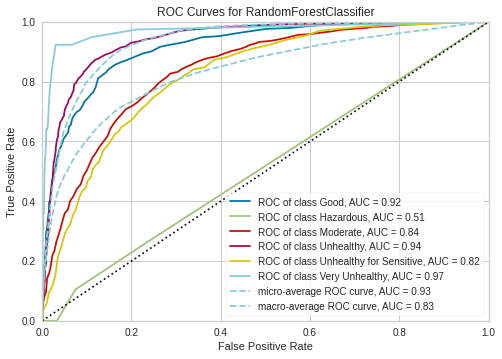

In [28]:
plot_model(rf)

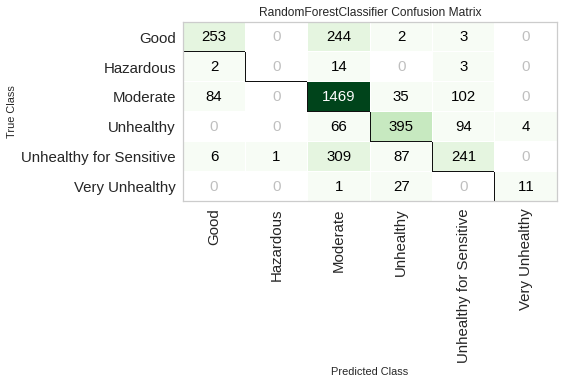

In [29]:
plot_model(rf, plot = 'confusion_matrix')

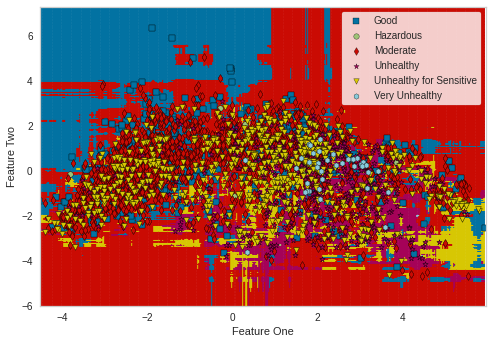

In [30]:
plot_model(rf, plot = 'boundary')

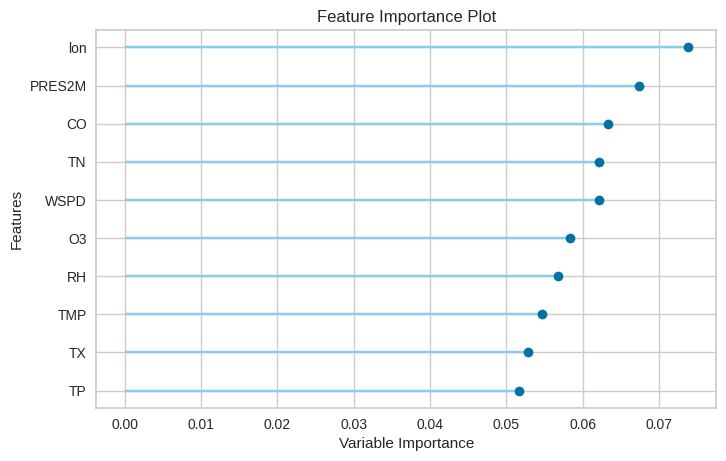

In [31]:
plot_model(rf, plot = 'feature')

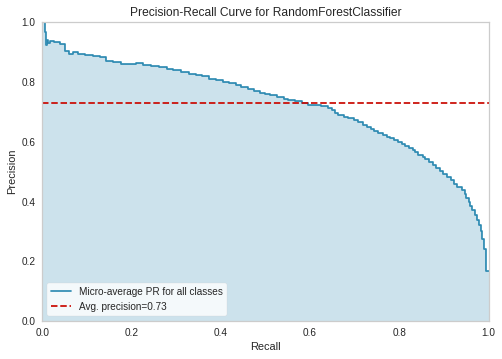

In [32]:
plot_model(rf, plot = 'pr')

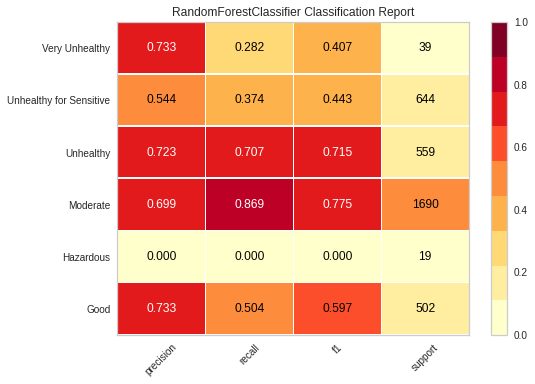

In [33]:
plot_model(rf, plot = 'class_report')

In [ ]:
evaluate_model(rf)

# 10. Interpret Model

In [ ]:
%pip -q install shape

  ERROR: Command errored out with exit status 1:
   command: /home/thu/miniconda3/envs/pycaret/bin/python /home/thu/miniconda3/envs/pycaret/lib/python3.6/site-packages/pip/_vendor/pep517/in_process/_in_process.py build_wheel /tmp/tmp9ejsed5r
       cwd: /tmp/pip-install-y91ka2ek/opencv-python-headless_a6aa59353c3a4a6e93056d746d9e4175
  Complete output (2537 lines):
  
  
  --------------------------------------------------------------------------------
  -- Trying 'Ninja' generator
  --------------------------------
  ---------------------------
  ----------------------
  -----------------
  ------------
  -------
  --
  CMake Deprecation Warning at CMakeLists.txt:1 (cmake_minimum_required):
    Compatibility with CMake < 3.5 will be removed from a future version of
    CMake.
  
    Update the VERSION argument <min> value or use a ...<max> suffix to tell
    CMake that the project does not need compatibility with older versions.
  
  Not searching for unused variables given on the com

In [ ]:
dt = create_model('rf', cross_validation=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6861,0.8636,0.456,0.6754,0.669,0.5078,0.5175


In [ ]:
interpret_model(dt)

In [ ]:
interpret_model(dt, plot = 'correlation')

In [ ]:
interpret_model(dt, plot = 'reason', observation = 12)

# 11. AutoML()

In [40]:
best = automl(optimize = 'Recall')
best

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

# 12. Predict Model

In [42]:
pred_holdouts = predict_model(dt)
pred_holdouts.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.6861,0.8636,0.4560,0.6754,0.6690,0.5078,0.5175


,lat,lon,SQRT_SEA_DEM_LAT,WSPD,WDIR,TMP,TX,TN,TP,RH,...,CO,HCHO,NO2,SO2,CLOUD,O3,AAI,AQI_Bucket,Label,Score
0,21.163853,105.923561,6.000813,4.620680,30.317810,15.333742,17.709986,13.489985,0.000000,49.099998,...,0.080435,0.000317,0.000056,-0.000389,0.187030,0.112409,0.118618,Moderate,Unhealthy for Sensitive,0.69
1,21.187340,106.074295,5.014936,4.157365,150.475220,21.374998,27.179987,16.540003,0.000000,66.800003,...,0.058313,0.000072,0.000092,0.000007,0.738616,0.104847,0.100007,Unhealthy,Unhealthy,0.66
2,21.187340,106.074295,5.014936,2.569136,137.445023,28.562510,33.450005,24.950006,0.000000,72.162498,...,0.036548,0.000229,0.000056,0.000015,0.448591,0.123157,-0.737085,Moderate,Moderate,0.71
3,21.127739,105.889542,5.476497,4.775660,356.188110,22.019312,22.851994,21.311989,43.293751,91.831253,...,0.046584,0.000004,0.000038,-0.000340,1.000000,0.113254,-0.286214,Good,Good,0.80
4,21.037727,106.146805,5.693217,1.361999,66.469971,22.162504,24.350000,20.040003,0.625000,83.350006,...,0.067815,0.000200,0.000064,-0.000044,0.374236,0.121116,-1.238526,Moderate,Unhealthy,0.28


In [43]:
new_data = data.copy()
new_data.drop(['AQI_Bucket'], axis=1, inplace=True)
predict_new = predict_model(best, data=new_data)
predict_new.head()

,lat,lon,SQRT_SEA_DEM_LAT,WSPD,WDIR,TMP,TX,TN,TP,RH,...,NDVI,CO,HCHO,NO2,SO2,CLOUD,O3,AAI,Label,Score
0,21.049750,105.741870,5.922647,1.136119,145.942749,20.811243,23.219995,18.939997,0.3750,74.750000,...,0.000551,0.045586,0.000060,0.000072,0.000035,0.711612,0.101653,-0.836203,Unhealthy,0.9657
1,21.015250,105.800130,4.307231,1.136119,145.942749,20.811243,23.219995,18.939997,0.3750,74.750000,...,-0.003006,0.041913,0.000107,0.000086,0.000056,0.761720,0.103635,-0.718537,Unhealthy,0.9418
2,21.024347,106.017288,4.988467,0.651509,145.395233,20.677492,23.029993,18.879999,0.1250,73.687500,...,0.004388,0.042329,0.000108,0.000071,0.000026,0.867689,0.102144,-0.942304,Unhealthy,0.9539
3,21.023532,105.853941,4.865087,1.136119,145.942749,20.811243,23.219995,18.939997,0.3750,74.750000,...,-0.001733,0.041913,0.000097,0.000085,0.000079,0.779294,0.102875,-0.692613,Unhealthy,0.9365
4,21.049750,105.741870,5.922647,2.744283,147.084442,22.176249,25.119989,20.299982,0.1875,78.012497,...,0.016035,0.042298,0.000115,0.000082,-0.000345,0.705396,0.103488,-1.119681,Unhealthy,0.9658


# 13. Save / Load Model

In [44]:
save_model(best, model_name='best-model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='AQI_Bucket', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                                 min_child_samples=20,

In [45]:
loaded_bestmodel = load_model('best-model')
print(loaded_bestmodel)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='AQI_Bucket', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                

In [46]:
from sklearn import set_config
set_config(display='diagram')
loaded_bestmodel[0]

DataTypes_Auto_infer(categorical_features=[], display_types=False,
                     features_todrop=[], id_columns=[],
                     ml_usecase='classification', numerical_features=[],
                     target='AQI_Bucket', time_features=[])

In [47]:
from sklearn import set_config
set_config(display='text')

# 14. Deploy Model

In [49]:
# deploy_model(best, model_name = 'best-aqi', authentication = {'bucket' : 'pycaret-test'})

# 15. Get Config / Set Config

In [50]:
X_train = get_config('X_train')
X_train.head()

,lat,lon,SQRT_SEA_DEM_LAT,WSPD,WDIR,TMP,TX,TN,TP,RH,PRES2M,NDVI,CO,HCHO,NO2,SO2,CLOUD,O3,AAI
8119,21.127739,105.889542,5.476497,4.656884,139.327652,27.138756,31.889997,24.395016,1.296875,81.721878,100434.093750,0.162177,0.058106,0.000224,0.000076,0.000078,0.753000,0.130769,-1.049371
4889,21.049749,105.741867,5.922647,1.026269,160.726410,25.083742,28.950006,21.609980,0.312500,76.425003,101387.750000,0.065338,0.045633,0.000193,0.000059,0.000653,0.954910,0.117939,-0.703959
7978,21.035398,106.102577,5.765338,3.476214,132.143402,25.187506,29.050013,23.150019,1.750000,86.574997,100834.062500,0.041251,0.054043,0.000145,0.000061,-0.000099,1.000000,0.127269,0.147979
3945,21.127739,105.889542,5.476497,1.194568,286.153168,30.316936,35.980007,25.788486,1.440625,64.440628,100499.367188,0.722939,0.037872,0.000312,0.000041,-0.000195,0.040128,0.124846,-2.311989
8997,21.119446,105.989601,5.465172,1.471096,113.247849,29.046253,32.789993,25.779997,5.718750,74.863747,100291.390625,0.038617,0.031323,0.000107,0.000039,-0.000097,0.655218,0.128333,-2.043514


In [55]:
get_config('seed')

999

# 16. MLFlow UI

In [ ]:
# import os
# os.system("lsof -i :5000")

256

In [ ]:
# !mlflow ui --port 5001
# !nohup mlflow ui --port 5001 &

/home/thu/miniconda3/envs/pycaret/bin/mlflow:5: FutureWarning: MLflow support for Python 3.6 is deprecated and will be dropped in an upcoming release. At that point, existing Python 3.6 workflows that use MLflow will continue to work without modification, but Python 3.6 users will no longer get access to the latest MLflow features and bugfixes. We recommend that you upgrade to Python 3.7 or newer.
  from mlflow.cli import cli
[2025-04-27 23:13:38 +0700] [3938696] [INFO] Starting gunicorn 21.2.0
[2025-04-27 23:13:38 +0700] [3938696] [INFO] Listening at: http://127.0.0.1:5001 (3938696)
[2025-04-27 23:13:38 +0700] [3938696] [INFO] Using worker: sync
[2025-04-27 23:13:38 +0700] [3938699] [INFO] Booting worker with pid: 3938699
/home/thu/miniconda3/envs/pycaret/lib/python3.6/importlib/__init__.py:126: FutureWarning: MLflow support for Python 3.6 is deprecated and will be dropped in an upcoming release. At that point, existing Python 3.6 workflows that use MLflow will continue to work withou

# End
Thank you. For more information / tutorials on PyCaret, please visit https://www.pycaret.org